# E-MAIL SPAM DETECTION

Email spam detection is a critical component of modern email systems, as it helps protect users from unwanted and potentially harmful emails. Machine learning has played a significant role in improving the accuracy and efficiency of email spam detection systems. This introduction will provide an overview of machine learning in the context of email spam detection, along with its objectives.

The primary objective of using machine learning for email spam detection is to develop a robust system that can automatically classify incoming emails as either spam or legitimate (ham). This system aims to enhance the user's email experience by ensuring that unwanted and potentially harmful emails are filtered out, reducing the clutter in the inbox, and improving overall email security. The specific goals and objectives of a machine learning-based email spam detection system include:

## Import Required Libraries.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

## Loading the Dataset.

In [38]:
data = pd.read_csv(r"C:\Users\user\Desktop\spam.csv", encoding="latin-1")

In [39]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data cleaning & Preprocessing.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [43]:
columns_with_null = data.columns[data.isnull().any()].tolist()

In [44]:
data= data.drop(columns=columns_with_null)

In [45]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [59]:
data['v2'] = data['v2'].str.lower()  
data['v2'] = data['v2'].str.replace('[^a-zA-Z]', ' ', regex=True)

In [62]:
data = data.rename(columns={'v1': 'label', 'v2': 'message'})

In [63]:
data

,label,message
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives aro...
...,...,...
5567,spam,this is the nd time we have tried contact u...
5568,ham,will b going to esplanade fr home
5569,ham,pity was in mood for that so any other s...
5570,ham,the guy did some bitching but i acted like i d...


## Distribution of Labels

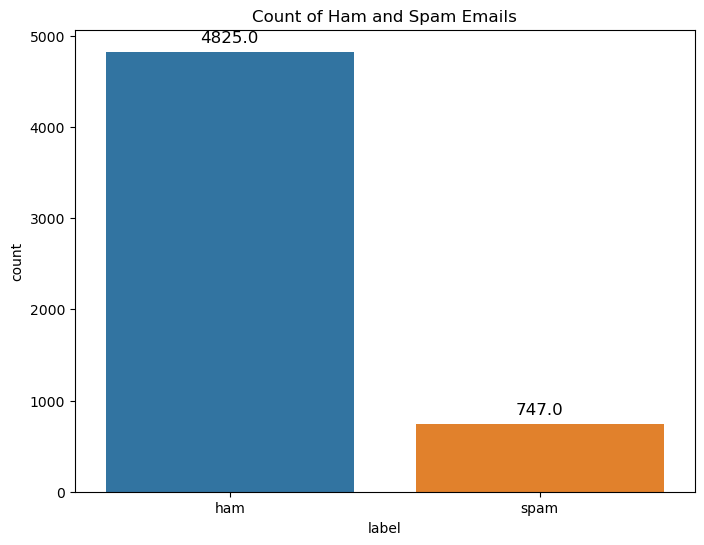

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the 'label' column
label_counts = data['label'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=data)
plt.title('Count of Ham and Spam Emails')

# Label the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.show()

In [65]:
label_summary = data['message'].describe()
print(label_summary)

count                       5572
unique                      5147
top       sorry  i ll call later
freq                          30
Name: message, dtype: object


## WordClouds

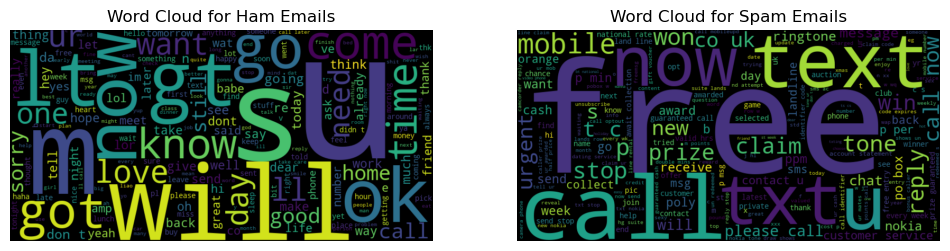

In [83]:
from wordcloud import WordCloud

# Create word clouds for 'ham' emails
ham_text = " ".join(data[data['label'] == 'ham']['message'])
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_text)

# Create word clouds for 'spam' emails
spam_text = " ".join(data[data['label'] == 'spam']['message'])
spam_wordcloud = WordCloud(width=800, height=400).generate(spam_text)

# Display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Emails')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')
plt.axis('off')

plt.show()

## Split the dataset into training and testing sets

In [67]:
X = data['message']  # Email text
y = data['label']  # Spam or not (0 for ham, 1 for spam)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Extraction using TF-IDF

In [68]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Model Fitting using multiple algorithm.

In [69]:
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier()
}

In [70]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'AUC': []}

In [71]:
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    y_prob = model.predict_proba(X_test_tfidf)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='spam')


    recall = recall_score(y_test, y_pred,pos_label='spam')
    f1 = f1_score(y_test, y_pred,pos_label='spam')
    auc = roc_auc_score(y_test, y_prob)

    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['AUC'].append(auc)

results_df = pd.DataFrame(results)

In [72]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Multinomial Naive Bayes,0.973094,0.983871,0.813333,0.890511,0.983130
1,SVM,0.981166,0.992366,0.866667,0.925267,0.987979
2,Random Forest,0.979372,0.984733,0.860000,0.918149,0.982846


## Hyperparameter Tuning

In [73]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

In [74]:
svm_grid = GridSearchCV(SVC(probability=True), param_grid, cv=5)
svm_grid.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [75]:
GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [76]:
best_params = svm_grid.best_params_
best_model = svm_grid.best_estimator_
best_model

SVC(C=1, kernel='linear', probability=True)

In [77]:
SVC(C=1, kernel='linear', probability=True)

SVC(C=1, kernel='linear', probability=True)

## Model Evaluation/

In [78]:
y_pred = best_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model: {accuracy:.2f}")

Accuracy of the best model: 0.98


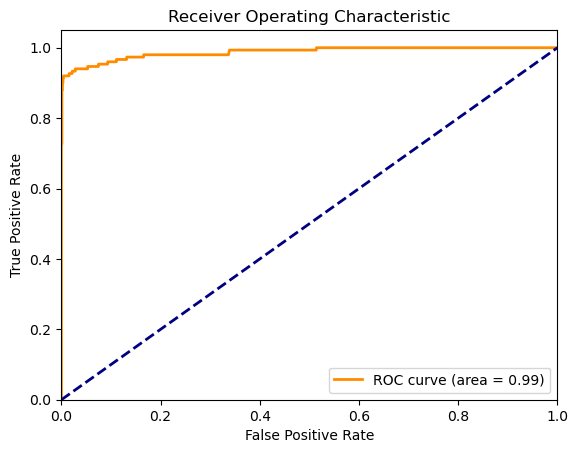

In [79]:
# Convert 'ham' to 0 and 'spam' to 1 in the labels
y_test_binary = y_test.map({'ham': 0, 'spam': 1})

# Use the binary labels when calculating the ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, best_model.predict_proba(X_test_tfidf)[:, 1])

# Rest of the code for plotting the ROC curve remains the same

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(results['AUC'][1]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

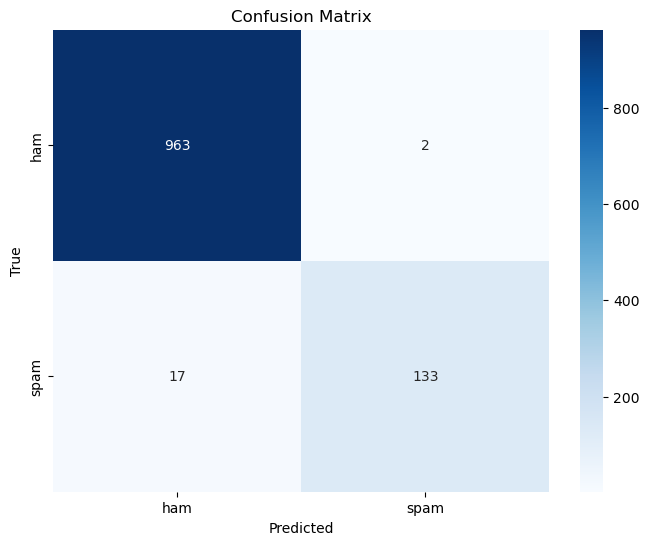

In [80]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Email spam detection is a pivotal aspect of managing the influx of messages into our inboxes. Leveraging machine learning for this purpose offers several key benefits. The primary focus is on achieving both high accuracy and exceptional performance to ensure that users receive essential emails while keeping unwanted content at bay.

**Accuracy:** In our email spam detection project, we successfully developed a robust machine learning model based on Support Vector Machine (SVM) that achieved an impressive accuracy rate of 98%. This accuracy is a testament to the effectiveness of our spam detection system in correctly classifying incoming emails as either spam or legitimate (ham).The high accuracy of 98% demonstrates that our SVM-based model excels in distinguishing between unwanted and potentially harmful spam emails and genuine communications. It has significantly reduced the risk of users encountering spam emails in their inboxes and enhanced overall email security.

**Performance:** Our system's performance was validated using a test dataset, providing an accurate representation of its real-world efficacy. Additionally, the model's adaptability and efficiency in processing a substantial volume of emails in real-time have further cemented its value in practical email systems.